# Weather prediction using a recursive CNN

Libraries loading and plot size setting

In [1]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

plt.rcParams['figure.figsize'] = [25, 12.5]

## Original data
Data loading from the csv file

In [2]:
weather_df = pd.read_csv("weather_dataset.csv")
print(weather_df.shape)
weather_df.head()

(70128, 5)


,wind_speed,wind_direction,temperature,dew_point,air_pressure
0,60,260,35,32,10185
1,60,260,36,33,10183
2,60,260,37,34,10181
3,50,260,38,35,10174
4,50,260,39,36,10169


In the following two chuncks I printed a plot to explore the data contaied in the dataset and I produce a summary of the values contained in the dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbce71d4710>,
      dtype=object)

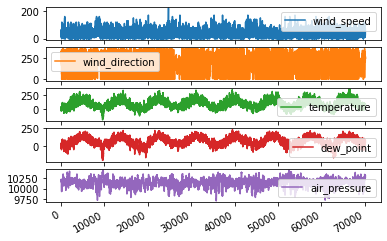

In [3]:
weather_df.plot(subplots = True)

In [16]:
weather_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wind_speed,70128.0,41.233174,23.449435,0.0,20.0,40.0,50.0,220.0
wind_direction,70128.0,186.578257,91.349559,0.0,110.0,200.0,250.0,360.0
temperature,70128.0,100.888604,67.935538,-189.0,53.0,99.0,149.0,355.0
dew_point,70128.0,70.425251,58.667802,-205.0,30.0,73.0,115.0,230.0
air_pressure,70128.0,10151.798896,96.989927,9714.0,10095.0,10157.0,10215.0,10443.0


In [20]:
weather_df.loc[weather_df["wind_speed"] == 0.0]

,wind_speed,wind_direction,temperature,dew_point,air_pressure
151,0,0,-12,-12,10077
695,0,0,-22,-22,10232
696,0,0,-20,-21,10229
721,0,0,-17,-19,10240
934,0,0,-8,-8,10240
...,...,...,...,...,...
68370,0,0,55,38,10270
68372,0,0,26,23,10276
68374,0,0,19,16,10278
69644,0,0,18,9,10243


## Data splitting
From requirements we know that the test set contains the last 168 rows of the dataset, this correspnds to the 0.24% of the dataset.

To split the remaining dataset rows into training and validation set I choose a "classic" 80/20 ratio.

In [29]:
n = weather_df.shape[0]

train_df = weather_df[0 : int(n * 0.8)]
print(train_df)
validation_df = weather_df[int(n * 0.8) : -168]
print(validation_df)
test_df = weather_df[-168 :]
print(test_df)

       wind_speed  wind_direction  temperature  dew_point  air_pressure
0              60             260           35         32         10185
1              60             260           36         33         10183
2              60             260           37         34         10181
3              50             260           38         35         10174
4              50             260           39         36         10169
...           ...             ...          ...        ...           ...
56097          30              30          208        146         10239
56098          30              80          224        145         10235
56099          30              60          230        147         10231
56100          50              50          231        145         10227
56101          50              50          231        144         10222

[56102 rows x 5 columns]
       wind_speed  wind_direction  temperature  dew_point  air_pressure
56102          50              30     

## Data Normalization
Given the information contained in the slides I used the mean normalization rather than the MinMax normalization.

Using the built-in functions of Pandas I computed the mean and standard deviation of the training set

In [ ]:
mean = train_df.mean()
std = train_df.std()

def transform(set: pd.DataFrame):
  

Then, I applied the transofrmation the tree sets

In [ ]:
train_df = (train_df - mean) / std